# Use WFS streaming data to load a network

It can be useful to rely on a road network when analyzing a collection of tracks. In France, the GeoPlatform offers geographic data streams that provide access to various IGN databases, including the BD TOPO® road network. In tracklib library, the static method *requestFromIgnGeoportail* loads data, available free and open, from the service and directly stores it in the *Network* structure.
<br/>
<div class="alert alert-block alert-info" style="padding:1em">
    
```python
  tkl.NetworkReader.requestFromIgnGeoportail(bbox:Bbox, margin=0.0, tolerance=0.1, spatialIndex=True, nomproxy=None) -> Network
```

</div>



## As usual, let's start by defining our environment

The first task is only useful for the online notebook and import the local tracklib code source. It's not necessary if tracklib is installed from PyPI.

In [1]:
import os
import sys

# Import de tracklib
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

The following two imports are necessary for the tutorial:

In [2]:
import matplotlib.pyplot as plt

# Import tracklib library
import tracklib as tkl

## Parameter initialization

### The bounding box

The coordinates of the extent must be defined in the WGS84 coordinate system.

In [3]:
xmin = 2.58183
xmax = 2.58988
ymin = 48.83999
ymax = 48.84301

bbox = tkl.Bbox(tkl.GeoCoords(xmin, ymin), tkl.GeoCoords(xmax, ymax))

### The tolerance threshold

This parameter specifies the maximum distance accepted for merging two nodes (edge ends)

In [4]:
tolerance = 0.0001

### Does the network need an index ?

In [5]:
spatialIndex = True

## Load a network

PAGE 1/1


100% (97 of 97) |########################| Elapsed Time: 0:00:00 Time:  0:00:000000
  5% (5 of 97) |#                        | Elapsed Time: 0:00:00 ETA:   0:00:02

Building [3423 x 5447] spatial index...


100% (97 of 97) |########################| Elapsed Time: 0:00:06 Time:  0:00:060000


Number of edges= 97
Number of nodes= 71


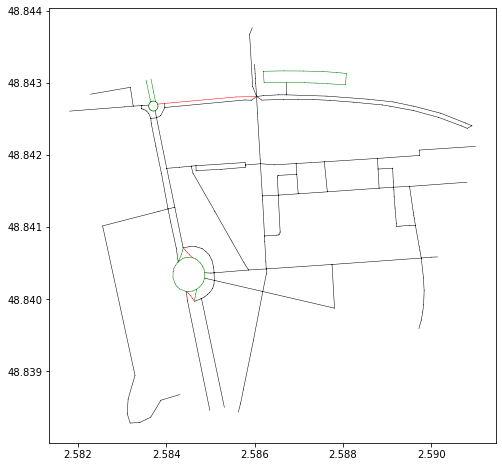

In [6]:
network = tkl.NetworkReader.requestFromIgnGeoportail(bbox, tolerance=tolerance, spatialIndex=spatialIndex)

plt.figure(figsize=(8, 8))
network.plot('k-', '', 'g-', 'r-', 0.5, plt)
print ('Number of edges=', len(network.EDGES))
print ('Number of nodes=', len(network.NODES))

## Proxy

If you are behind a proxy, you need to specify the *proxy* parameter so that the function calling the WFS service from BDTOPO takes it into account. The connexion parameters is a dictionnary with two keys:
```python

myproxy = {
'HTTP': 'proxy.ign.fr:3128',
'HTTPS': 'proxy.ign.fr:3128'
}

tkl.NetworkReader.requestFromIgnGeoportail(...., proxy=myproxy)
```



PAGE 1/1


100% (97 of 97) |########################| Elapsed Time: 0:00:00 Time:  0:00:000000
  5% (5 of 97) |#                        | Elapsed Time: 0:00:00 ETA:   0:00:02

Building [3423 x 5447] spatial index...


100% (97 of 97) |########################| Elapsed Time: 0:00:06 Time:  0:00:060000


Number of edges= 97
Number of nodes= 71


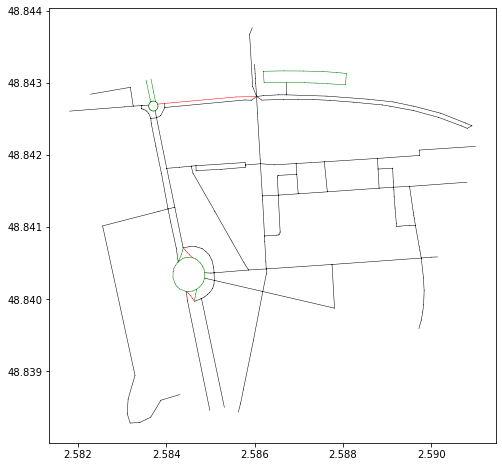

In [7]:
myproxy = {
    'HTTP': 'proxy.ign.fr:3128',
    'HTTPS': 'proxy.ign.fr:3128'
}
network = tkl.NetworkReader.requestFromIgnGeoportail(bbox, tolerance=tolerance, spatialIndex=spatialIndex, proxy=myproxy)

plt.figure(figsize=(8, 8))
network.plot('k-', '', 'g-', 'r-', 0.5, plt)
print ('Number of edges=', len(network.EDGES))
print ('Number of nodes=', len(network.NODES))